<a href="https://colab.research.google.com/github/ShubhamW248/HypothesisTests/blob/main/Wine_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wine Quality Analysis Notebook

In this notebook, we analyze the Wine Quality dataset to uncover how chemical properties impact wine quality scores. We perform extensive exploratory data analysis with visualizations and apply a range of statistical methods—including correlation analysis, ANOVA, and regression—to test our hypotheses and reveal significant predictors.
- *Correlation analysis:* Quantifies the linear relationship between chemical properties (e.g., acidity, alcohol) and quality.
- *ANOVA:* Compares mean quality scores across groups (e.g., wines binned by volatile acidity) to detect significant differences.
- *Regression analysis:* Evaluates multiple predictors simultaneously to identify which factors significantly affect wine quality.
- *Nonparametric tests:* (Optional) Apply methods like the Mann‑Whitney U test for variables that don’t meet normality assumptions.


# Setup and Data Loading


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Set visualization style and seed
sns.set(style="whitegrid", context="talk")
%matplotlib inline
np.random.seed(42)

# Load the Wine Quality dataset (red wine) from the UCI repository
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url_red, sep=';')
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#  Data Preprocessing and EDA

Dataset shape: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000    

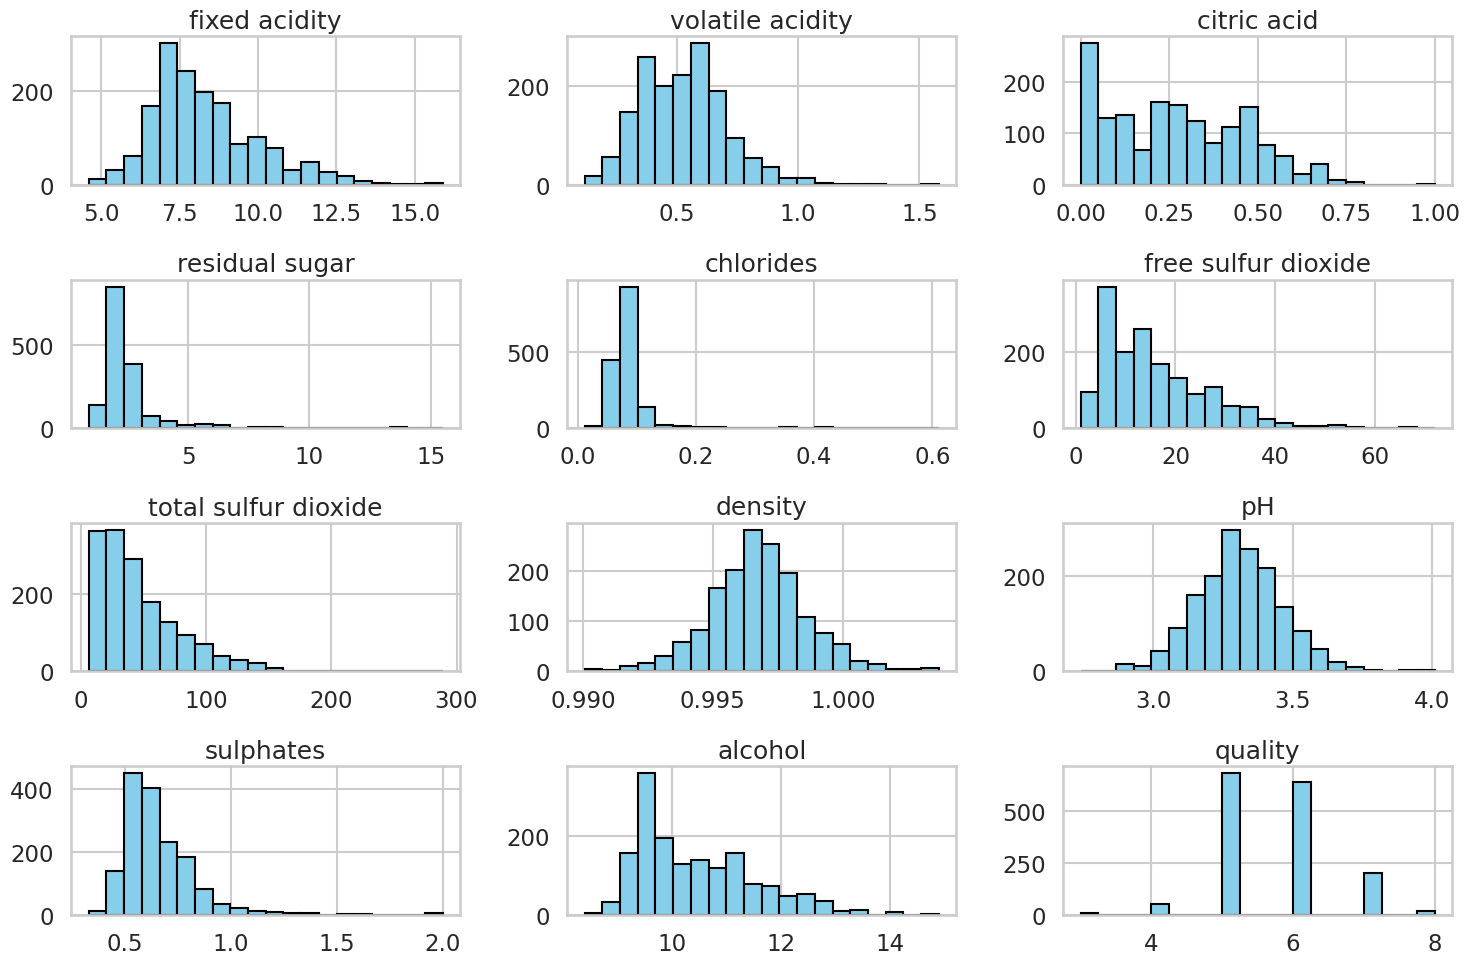

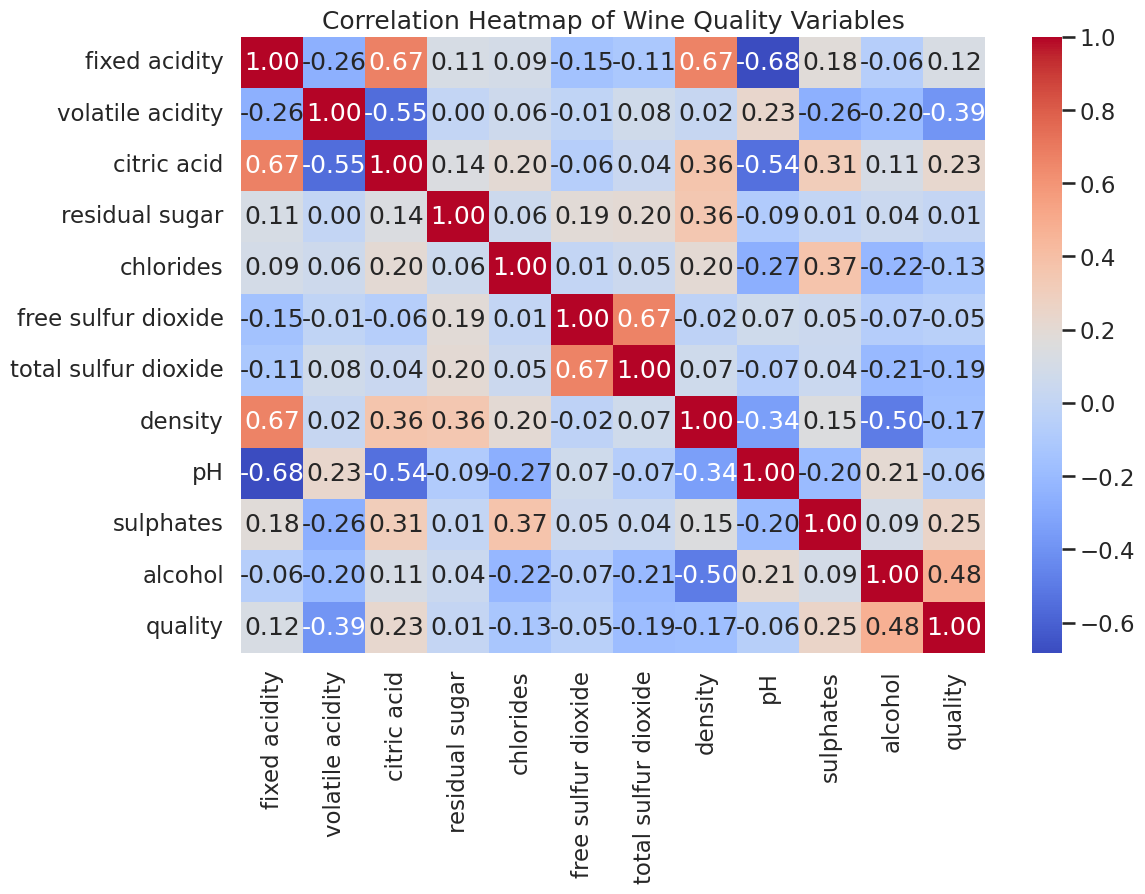

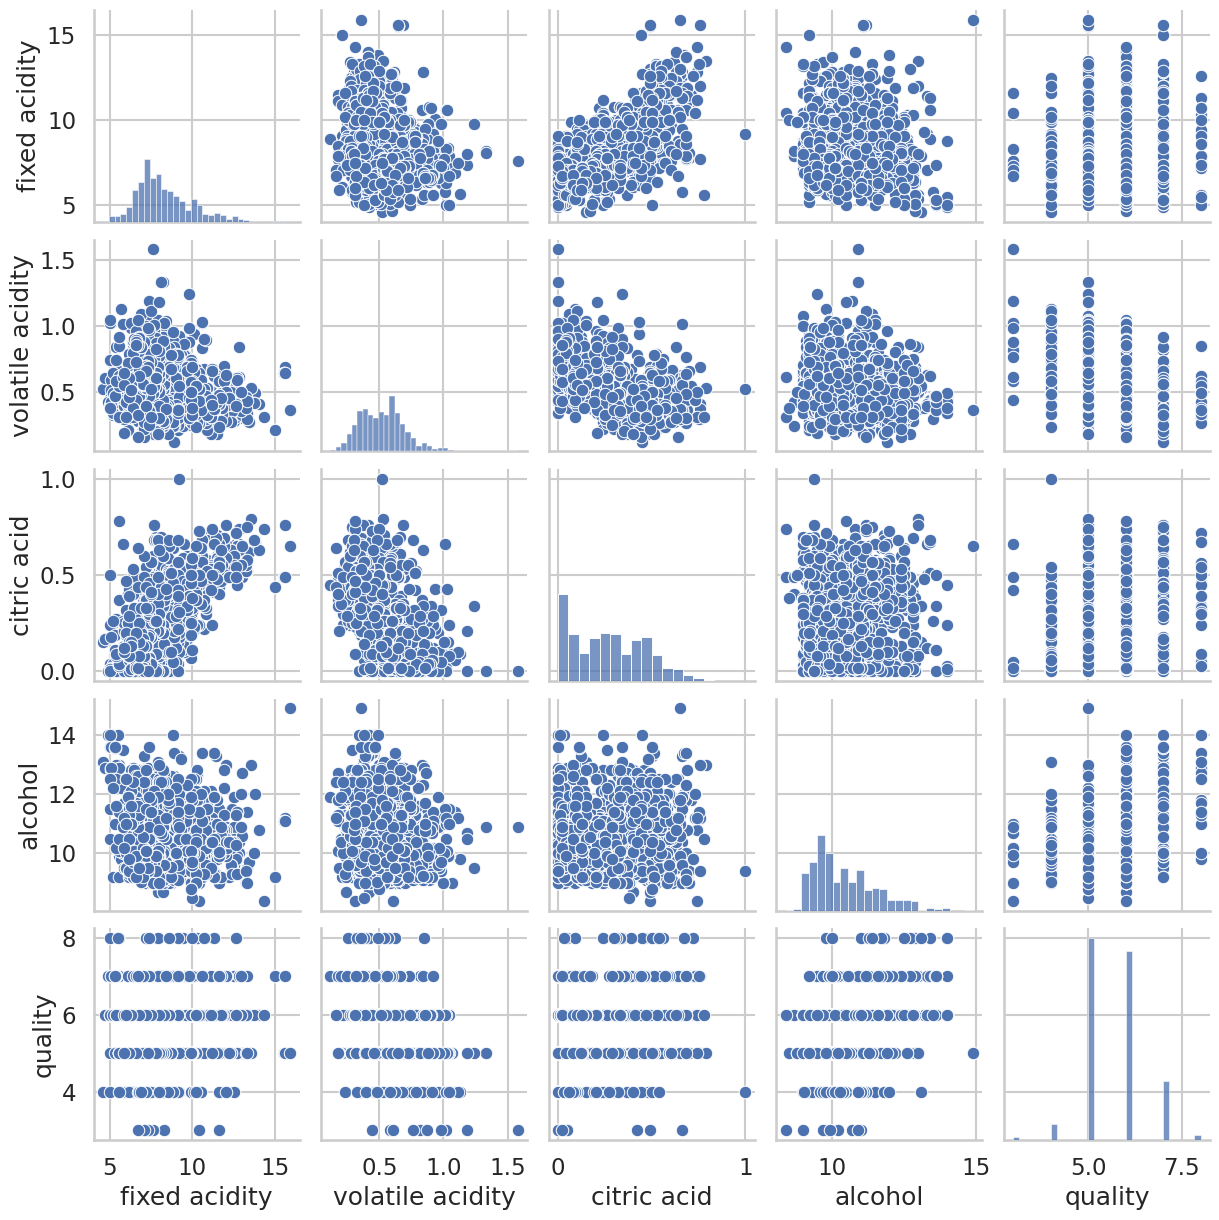

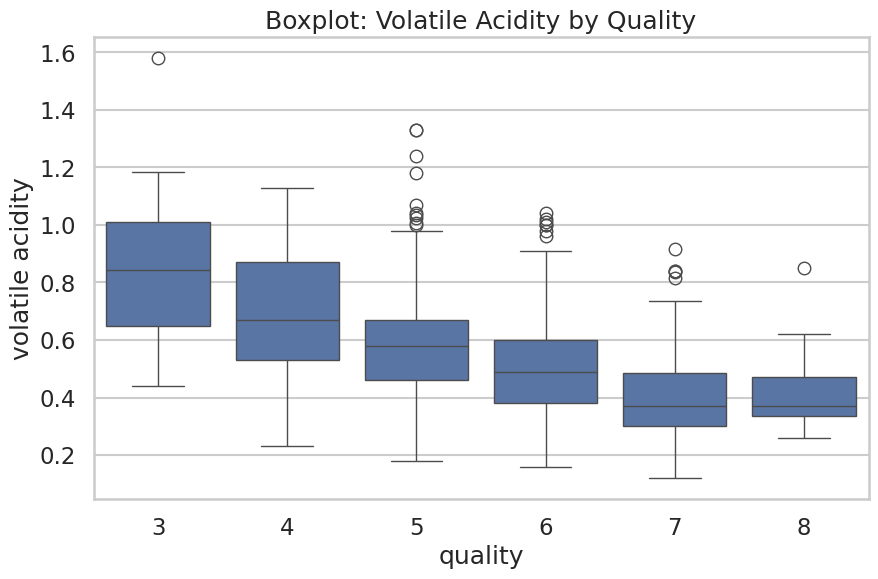

In [2]:
print("Dataset shape:", wine.shape)
print(wine.info())
print(wine.describe())

wine.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = wine.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Wine Quality Variables")
plt.show()

# Pairplot for selected variables
sns.pairplot(wine, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality'])
plt.show()

# Boxplot: Volatile acidity across different quality scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=wine)
plt.title("Boxplot: Volatile Acidity by Quality")
plt.show()


# Hypothesis Testing and Regression Analysis

Correlation Analysis: between alcohol and quality

In [3]:
corr_alcohol_quality, p_corr = stats.pearsonr(wine['alcohol'], wine['quality'])
print("Correlation between alcohol and quality:")
print(f"Correlation coefficient: {corr_alcohol_quality:.3f}, p-value: {p_corr:.5f}")


Correlation between alcohol and quality:
Correlation coefficient: 0.476, p-value: 0.00000


ANOVA: Check if mean quality differs across binned volatile acidity groups

In [4]:
wine['volatile_acidity_bin'] = pd.qcut(wine['volatile acidity'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
anova_result = smf.ols('quality ~ C(volatile_acidity_bin)', data=wine).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print("\nANOVA result for quality across volatile acidity bins:")
print(anova_table)



ANOVA result for quality across volatile acidity bins:
                             sum_sq      df         F        PR(>F)
C(volatile_acidity_bin)  139.930804     3.0  82.45812  1.355327e-49
Residual                 902.234299  1595.0       NaN           NaN


Multiple Regression: Predict quality using selected chemical properties

In [12]:
# Rename columns: replace spaces with underscores
wine.columns = [col.replace(' ', '_') for col in wine.columns]

# Fit the regression model using the renamed columns
model = smf.ols('quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + alcohol', data=wine).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          4.61e-133
Time:                        13:28:04   Log-Likelihood:                -1612.7
No. Observations:                1599   AIC:                             3237.
Df Residuals:                    1593   BIC:                             3270.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.6259      0.219  

Nonparametric Test: Mann-Whitney U test comparing quality distributions for high vs. low alcohol wines


In [13]:
median_alcohol = wine['alcohol'].median()
group_high = wine[wine['alcohol'] > median_alcohol]['quality']
group_low = wine[wine['alcohol'] <= median_alcohol]['quality']
u_stat, p_u = stats.mannwhitneyu(group_high, group_low, alternative='two-sided')
print("\nMann-Whitney U Test (Quality for high vs. low alcohol):")
print(f"U statistic: {u_stat:.3f}, p-value: {p_u:.5f}")



Mann-Whitney U Test (Quality for high vs. low alcohol):
U statistic: 464768.500, p-value: 0.00000


Conclusion and Regression Visualization

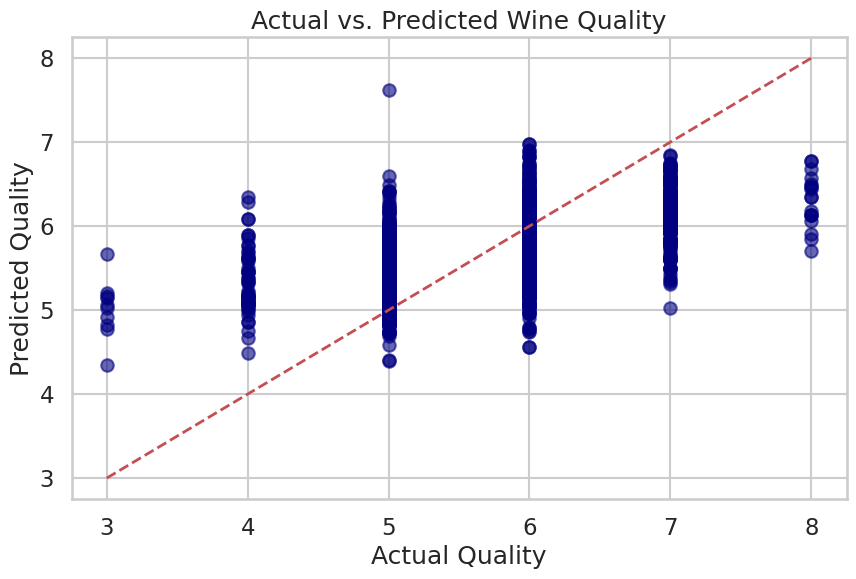

Summary of Analysis:
1. A significant positive correlation exists between alcohol content and wine quality.
2. ANOVA indicates differences in quality across groups based on volatile acidity levels.
3. Multiple regression highlights key predictors of quality.
4. The Mann-Whitney U test supports significant differences in quality for high vs. low alcohol levels.


In [14]:

# Add predicted quality from the regression model to the dataset
wine['predicted_quality'] = model.predict(wine)

# Scatter plot: Actual vs. Predicted Quality
plt.figure(figsize=(10, 6))
plt.scatter(wine['quality'], wine['predicted_quality'], alpha=0.6, color='navy')
plt.plot([wine['quality'].min(), wine['quality'].max()],
         [wine['quality'].min(), wine['quality'].max()],
         'r--', lw=2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality")
plt.show()

# Summary output
print("Summary of Analysis:")
print("1. A significant positive correlation exists between alcohol content and wine quality.")
print("2. ANOVA indicates differences in quality across groups based on volatile acidity levels.")
print("3. Multiple regression highlights key predictors of quality.")
print("4. The Mann-Whitney U test supports significant differences in quality for high vs. low alcohol levels.")
